In [78]:
# Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [45]:
# Importing the data
data = pd.read_csv('churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
# Exploring the dataset
print('''
Explorational analysis of the dataset
=====================================
''')
print(data.columns)
print('-----------------')
print(data.info())


Explorational analysis of the dataset

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActi

In [17]:
print('''
Descriptive statistics of the dataset
=====================================
''')
print(data.describe())


Descriptive statistics of the dataset

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584     

In [50]:
# Chenking for imblalances in the data
print('''
            Checking for imbalance at label
            ===============================

             Not exited      Exited
            -----------   -----------
                 {}        {}
percentage:      {}         {}
'''.format(data['Exited'].value_counts()[0], data['Exited'].value_counts()[1],
 round(data['Exited'].value_counts()[0]/ data.shape[0],2), round(data['Exited'].value_counts()[1]/ data.shape[0],2)))



            Checking for imbalance at label

             Not exited      Exited
            -----------   -----------
                 7963        2037
percentage:      0.8         0.2



In [35]:
# Checking the number of unique values per column
for column in data.columns:
    print(column,':', len(data[column].unique()))

RowNumber : 10000
CustomerId : 10000
Surname : 2932
CreditScore : 460
Geography : 3
Gender : 2
Age : 70
Tenure : 11
Balance : 6382
NumOfProducts : 4
HasCrCard : 2
IsActiveMember : 2
EstimatedSalary : 9999
Exited : 2


In [55]:
# Dropping the column with 10.000 unique values along with surname
data = data.drop(['RowNumber','CustomerId', 'Surname'], axis=1)

In [74]:
# Checking for duplicate observations
print('Is there any duplicates in the data:', data.duplicated().any())

Is there any duplicates in the data: False


In [56]:
# Further exploring the categorical features of the dataset
print(data['Gender'].value_counts())
print('-------------------')
print(data['Geography'].value_counts())
print('-------------------')
print(data['IsActiveMember'].value_counts())

Male      5457
Female    4543
Name: Gender, dtype: int64
-------------------
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
-------------------
1    5151
0    4849
Name: IsActiveMember, dtype: int64


## Checking for outliers in the numeric columns

/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

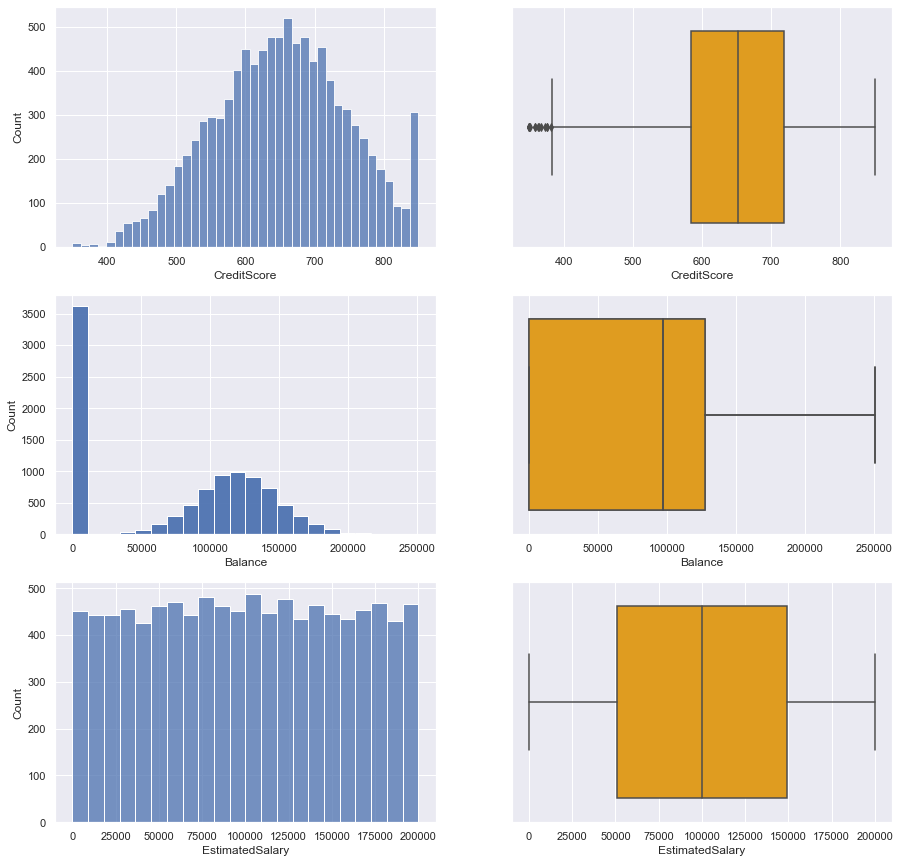

In [73]:
# Checking for outliers in the numeric columns

sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Cheking the credit scores
sns.histplot(data['CreditScore'], ax=axs[0,0])
sns.boxplot(data['CreditScore'], ax=axs[0,1], color='orange')

# Checking the Balance
sns.histplot(data['Balance'], ax=axs[1,0])
sns.boxplot(data['Balance'], ax=axs[1,1], color='orange')

# Checking the Estimated salaries
sns.histplot(data['Balance'], ax=axs[1,0])
sns.boxplot(data['Balance'], ax=axs[1,1], color='orange')

# Plotting the results
sns.histplot(data['EstimatedSalary'], ax=axs[2,0])
sns.boxplot(data['EstimatedSalary'], ax=axs[2,1], color='orange')

plt.show()


In [89]:
## Finding for creditScore
# Calculating the Z scores
Z_credit = stats.zscore(data["CreditScore"],nan_policy="omit") #compute z-score table
# Find the ones with Z scores out of the range [-3,3]
print('Outliers at credit scores')
print('=========================')
print(np.where((Z_credit>3) | (Z_credit<-3)))


## Finding for Balance
# Calculating the Z scores
Z_balance = stats.zscore(data["Balance"],nan_policy="omit") #compute z-score table
# Find the ones with Z scores out of the range [-3,3]
print('Outliers at Balance')
print('===================')
print(np.where((Z_balance>3) | (Z_balance<-3)))

## Finding for Estimated salaries
# Calculating the Z scores
Z_salary = stats.zscore(data["EstimatedSalary"],nan_policy="omit") #compute z-score table
# Find the ones with Z scores out of the range [-3,3]
print('Outliers at Estimated Salary')
print('============================')
print(np.where((Z_salary>3) | (Z_salary<-3)))

Outliers at credit scores
(array([1405, 1631, 1838, 1962, 2473, 8723, 8762, 9624]),)
Outliers at Balance
(array([], dtype=int64),)
Outliers at Estimated Salary
(array([], dtype=int64),)
